# EDA on **Cryptocurrency**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Load the Data set

In [ ]:
df = pd.read_csv("/content/ETH-BTC-USD.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Currency
0,11/14/2018,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09,Etherium
1,11/15/2018,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09,Etherium
2,11/16/2018,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09,Etherium
3,11/17/2018,175.360001,175.850998,172.869003,174.001007,174.001007,1.832800e+09,Etherium
4,11/18/2018,174.175003,179.151993,174.175003,177.067001,177.067001,1.810920e+09,Etherium


In [ ]:
df.shape

(3654, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Currency'],
      dtype='object')

In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64
Currency,object


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Currency,0


In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Currency
count,3654,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03,3654
unique,1827,NaN,NaN,NaN,NaN,NaN,NaN,2
top,11/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,Etherium
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,1827
mean,NaN,12489.722362,12779.702503,12176.712024,12497.298504,12497.298504,2.132673e+10,NaN
std,NaN,15981.149824,16367.131613,15548.523408,15982.555689,15982.555689,1.657009e+10,NaN
min,NaN,84.279694,85.342743,82.829887,84.308296,84.308296,1.496177e+09,NaN
25%,NaN,1318.626008,1346.194641,1275.408967,1320.796630,1320.796630,9.610954e+09,NaN
50%,NaN,3880.535767,3964.966553,3783.871582,3881.728149,3881.728149,1.741543e+10,NaN
75%,NaN,20589.010253,21038.371580,20185.608885,20598.490722,20598.490722,2.857312e+10,NaN


Convert the date into Datetime

In [ ]:
df['Date'] = pd. to_datetime(df['Date'])

In [ ]:
df = df.sort_values('Date')

Check for the duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

Confirm all the numeric columns are clean

In [ ]:
df[['Open','High','Low','Close','Adj Close','Volume']].head()

,Open,High,Low,Close,Adj Close,Volume
0,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09
1827,6351.240234,6371.549805,5544.089844,5738.350098,5738.350098,7.398940e+09
1,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09
1828,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7.032140e+09
2,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09


Will create new features for EDA

In [ ]:
#Daily Return
df['Daily_Return'] = df['Close'].pct_change()

In [ ]:
#Price Range
df['Price_Range'] = df['High']- df['Low']

In [ ]:
#Rolling Moving Averages
#7-day and 30-day moving averages
df['MA_7'] = df['Close'].rolling(7).mean()
df['MA_30'] = df['Close'].rolling(30).mean()

In [ ]:
#Rolling Volatility
#7-day and 30-day rolling volatility
df['Volatility_7'] = df['Daily_Return'].rolling(7).std()
df['Volatility_30'] = df['Daily_Return'].rolling(30).std()

Check the new features added for the EDA

In [ ]:
df[['Date','Close','Daily_Return','Price_Range','MA_7','MA_30','Volatility_7','Volatility_30']].head(10)

,Date,Close,Daily_Return,Price_Range,MA_7,MA_30,Volatility_7,Volatility_30
0,2018-11-14,181.397003,NaN,32.960998,NaN,NaN,NaN,NaN
1827,2018-11-14,5738.350098,30.634206,827.459961,NaN,NaN,NaN,NaN
1,2018-11-15,180.806000,-0.968492,14.062012,NaN,NaN,NaN,NaN
1828,2018-11-15,5648.029785,30.238066,416.439941,NaN,NaN,NaN,NaN
2,2018-11-16,175.177002,-0.968984,8.223999,NaN,NaN,NaN,NaN
1829,2018-11-16,5575.549805,30.828092,158.080079,NaN,NaN,NaN,NaN
3,2018-11-17,174.001007,-0.968792,2.981995,2524.758671,NaN,NaN,NaN
1830,2018-11-17,5554.330078,30.921252,59.020019,3292.320539,NaN,16.905181,NaN
4,2018-11-18,177.067001,-0.968121,4.976990,2497.851525,NaN,16.908870,NaN
1831,2018-11-18,5623.540039,30.759391,93.869629,3275.384960,NaN,16.921874,NaN


Check for null values

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Currency,0
Daily_Return,1
Price_Range,0


# VISUAL PLOTS

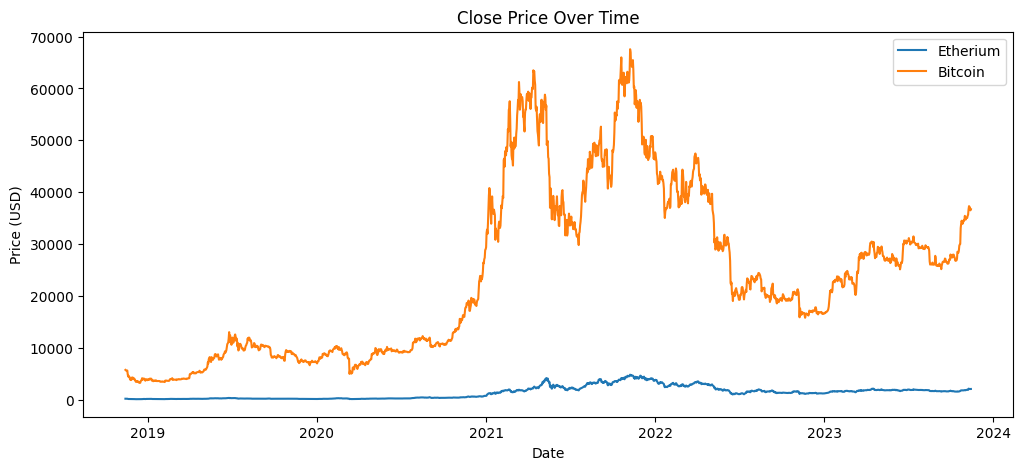

In [ ]:
#CLOSE PRICE OVER TIME(ETH vs BTC)
plt.figure(figsize=(12,5))
for coin in df['Currency'].unique():
  temp = df[df['Currency'] == coin]
  plt.plot(temp['Date'],temp['Close'],label=coin)

plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

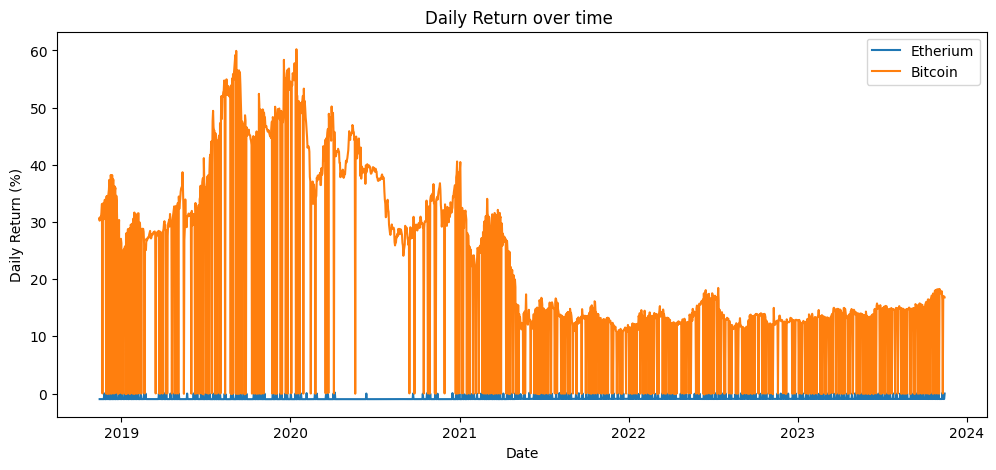

In [ ]:
#DAILY RETURNS OVER TIME
plt.figure(figsize=(12,5))
for coin in df['Currency'].unique():
  temp = df[df['Currency']== coin]
  plt.plot(temp['Date'], temp['Daily_Return'],label = coin)

plt.title("Daily Return over time ")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

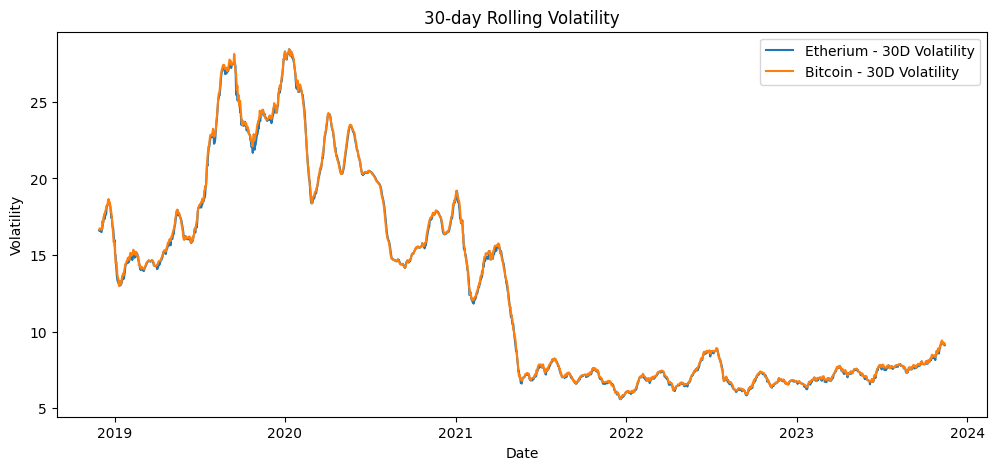

In [ ]:
#Volatility Charts
plt.figure(figsize=(12,5))
for coin in df['Currency'].unique():
  temp=df[df['Currency'] == coin]
  plt.plot(temp['Date'], temp['Volatility_30'],label=f"{coin} - 30D Volatility")

plt.title("30-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

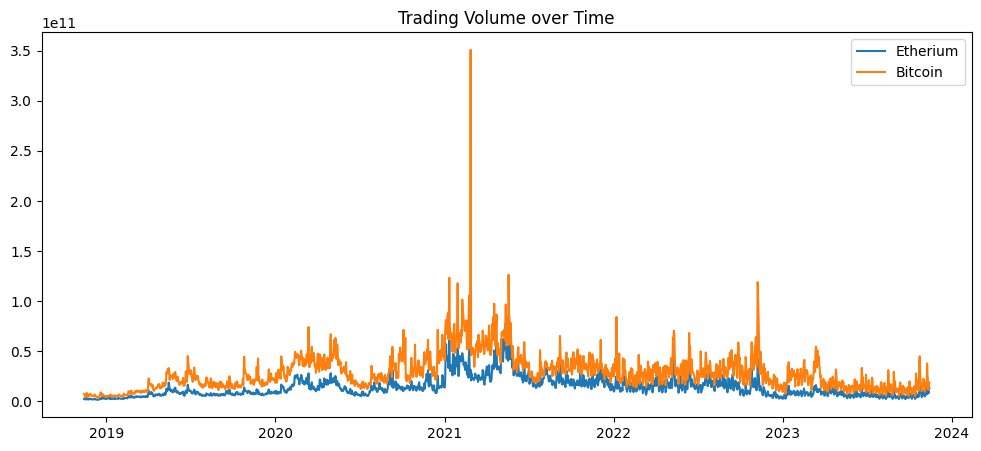

In [ ]:
#VOLUME OVER TIME
plt.figure(figsize=(12,5))
for coin in df['Currency'].unique():
  temp = df[df['Currency'] == coin]
  plt.plot(temp['Date'],temp['Volume'],label=coin)
plt.title("Trading Volume over Time")
plt.legend()
plt.show()

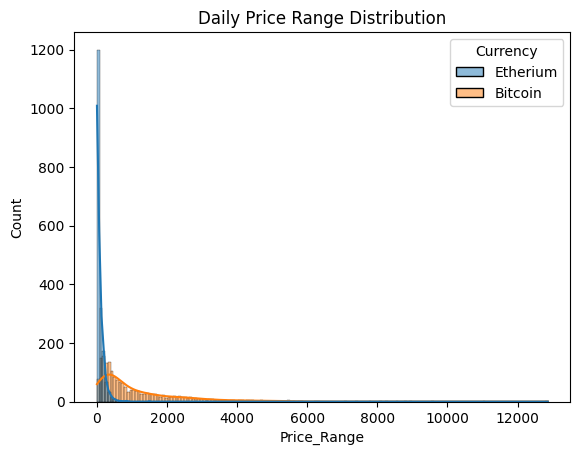

In [ ]:
#PRICE RANGE DISTRIBUTION
sns.histplot(data=df, x="Price_Range", hue="Currency", kde=True)
plt.title("Daily Price Range Distribution")
plt.show()

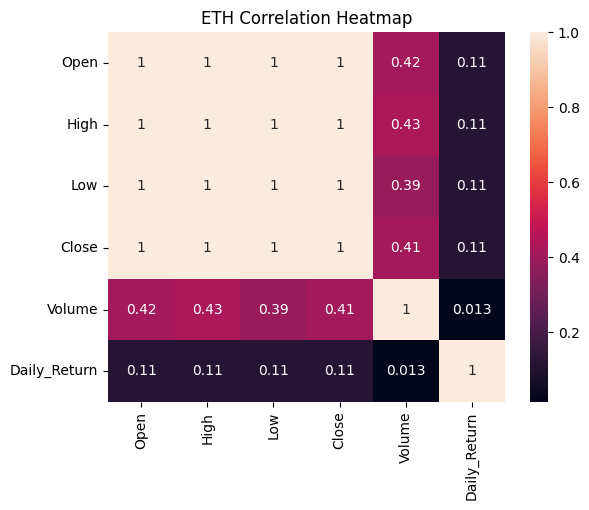

In [ ]:
#Correlation Heatmap of ETH:
eth = df[df['Currency']=="Etherium"]
sns.heatmap(eth[['Open','High','Low','Close','Volume','Daily_Return']].corr(), annot=True)
plt.title("ETH Correlation Heatmap")
plt.show()

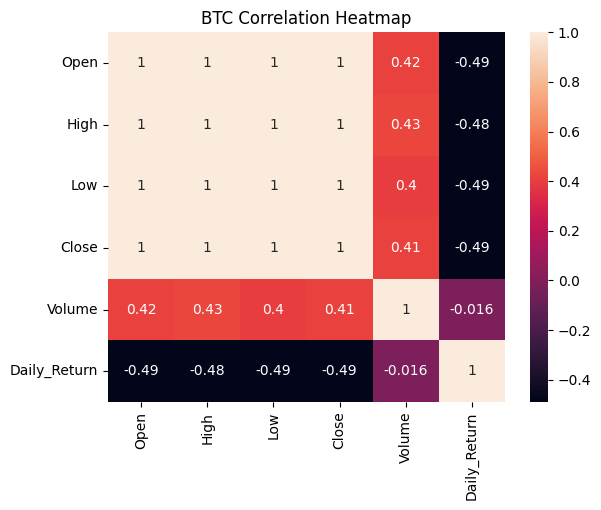

In [ ]:
#Correlation Heatmap of BTC:
btc = df[df['Currency']=="Bitcoin"]
sns.heatmap(btc[['Open','High','Low','Close','Volume','Daily_Return']].corr(), annot=True)
plt.title("BTC Correlation Heatmap")
plt.show()

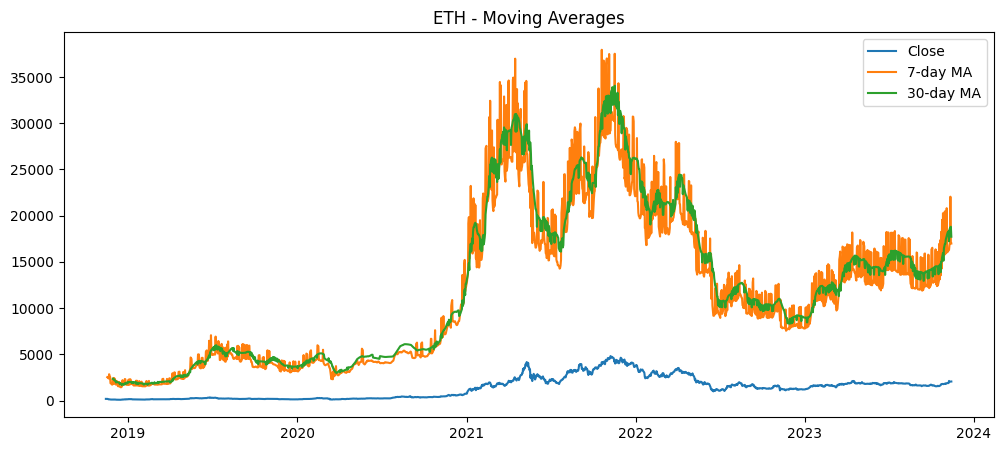

In [ ]:
#Moving Averages of ETH
eth = df[df['Currency']=="Etherium"]

plt.figure(figsize=(12,5))
plt.plot(eth['Date'], eth['Close'], label='Close')
plt.plot(eth['Date'], eth['MA_7'], label='7-day MA')
plt.plot(eth['Date'], eth['MA_30'], label='30-day MA')
plt.title("ETH - Moving Averages")
plt.legend()
plt.show()

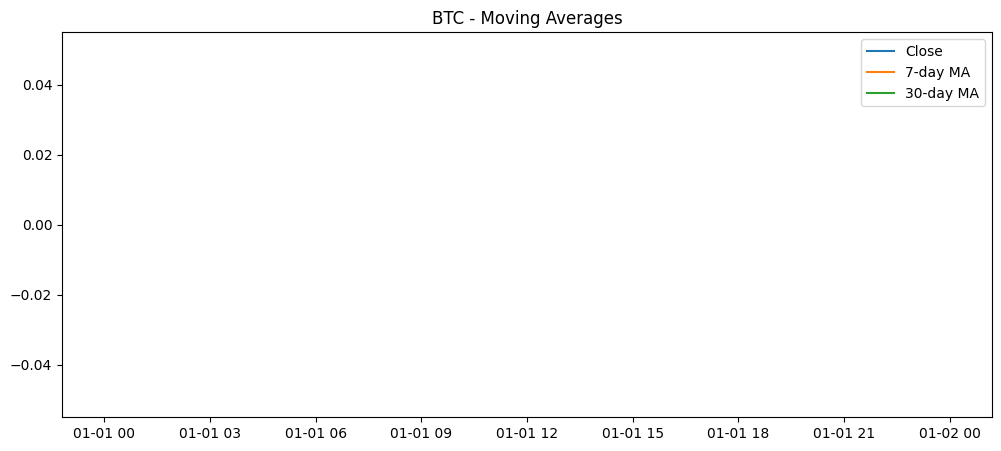

In [ ]:
#Moving Averages of Bitcoin
btc = df[df['Currency']==" Bitcoin"]

plt.figure(figsize=(12,5))
plt.plot(btc['Date'], btc['Close'], label='Close')
plt.plot(btc['Date'], btc['MA_7'], label='7-day MA')
plt.plot(btc['Date'], btc['MA_30'], label='30-day MA')
plt.title("BTC - Moving Averages")
plt.legend()
plt.show()

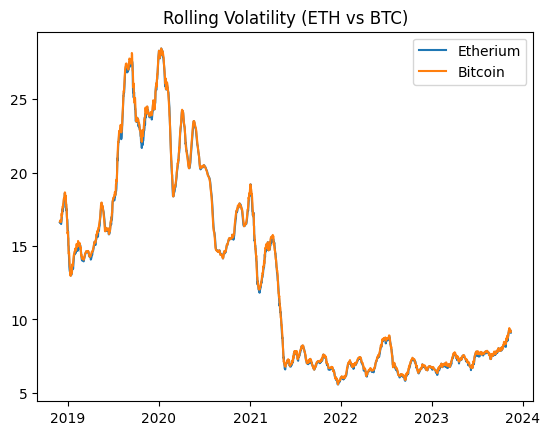

In [ ]:
#Rolling Volatility
for coin in df['Currency'].unique():
  temp=df[df['Currency']==coin]
  plt.plot(temp['Date'], temp['Volatility_30'], label=coin)

plt.legend()
plt.title("Rolling Volatility (ETH vs BTC)")
plt.show()